In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_excel('employee_attrition_rate.xlsx','employee_attrition')

In [3]:
data.shape

(1470, 35)

In [4]:
pd.set_option('display.max_columns', None)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
data.duplicated().sum()

0

In [7]:
data[['Education', 'EnvironmentSatisfaction','JobInvolvement','JobLevel', 'JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']]=data[['Education', 'EnvironmentSatisfaction','JobInvolvement','JobLevel', 'JobSatisfaction','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']].astype('object')

In [8]:
data.describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,1024.865306,65.891156,6502.931293,14313.103401,2.693197,15.209524,80.0,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,602.024335,20.329428,4707.956783,7117.786044,2.498009,3.659938,0.0,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,491.250000,48.000000,2911.000000,8047.000000,1.000000,12.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,1020.500000,66.000000,4919.000000,14235.500000,2.000000,14.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,1555.750000,83.750000,8379.000000,20461.500000,4.000000,18.000000,80.0,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,2068.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
data.describe(include=["object"])

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,5,6,4,2,4,5,9,4,3,1,2,2,4,4,4
top,No,Travel Rarely,Research & Development,3,Life Sciences,3,Male,3,1,Sales Executive,4,Married,Y,No,3,3,0,3
freq,1233,1043,961,572,606,453,882,868,543,326,459,673,1470,1054,1244,459,631,893


In [10]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
data.drop(['EmployeeNumber','Over18','StandardHours','EmployeeCount'],axis=1,inplace=True)

In [12]:
data.shape

(1470, 31)

In [13]:
#Divide numeric and categorical columns
numeric = [col for col in data if data[col].dtypes != 'object']
print(numeric)
categorical = [col for col in data if data[col].dtypes == 'object']
print(categorical)


['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']


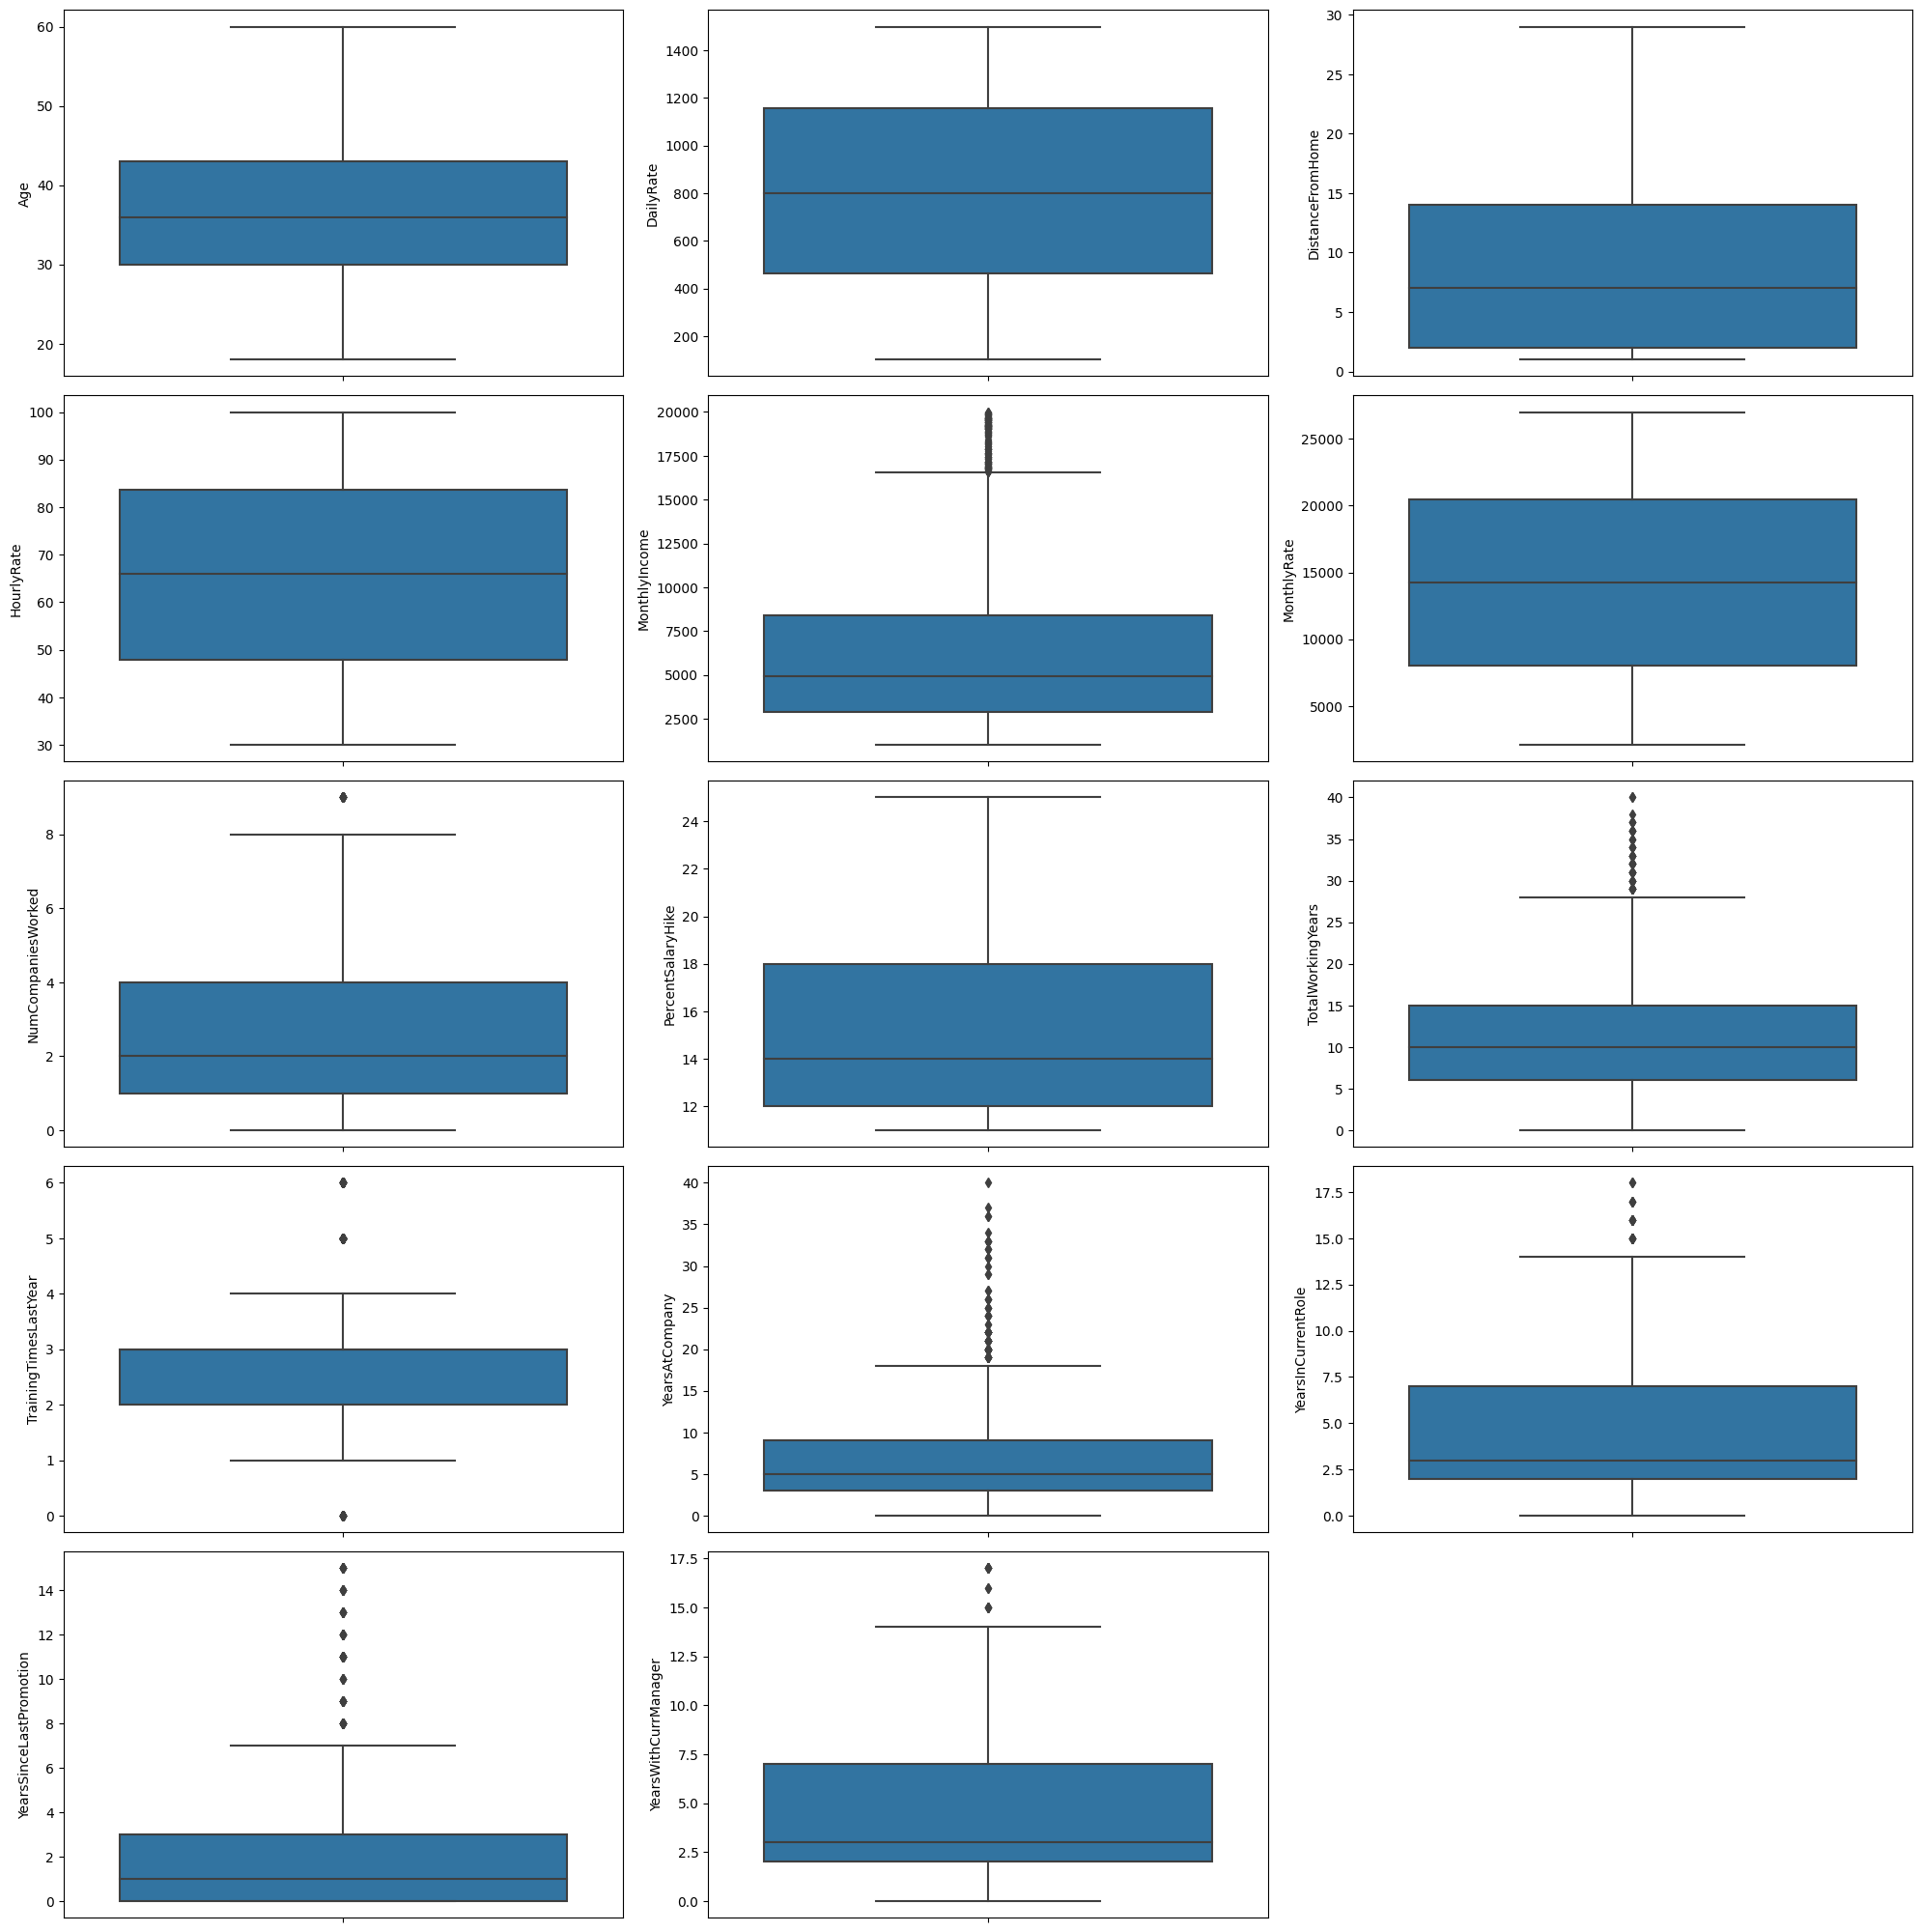

In [14]:
plt.rcParams["figure.figsize"] = (20,40)
for i in range(0, len(numeric)):
    plt.subplot(10,3,i+1)
    sns.boxplot(y=data[numeric[i]])
    plt.tight_layout()

# spliting

In [15]:
x=data.drop(['Attrition'],axis=1)
y=data['Attrition']

In [16]:
y=y.map({'No':0,'Yes':1})
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [17]:
x.shape

(1470, 30)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=10)

In [20]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1029, 30), (441, 30), (1029,), (441,))

# correlation plot

C:\Users\linet\AppData\Local\Temp\ipykernel_17316\507776089.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(x_train.corr(),vmax=0.8, annot=True)


<AxesSubplot: >

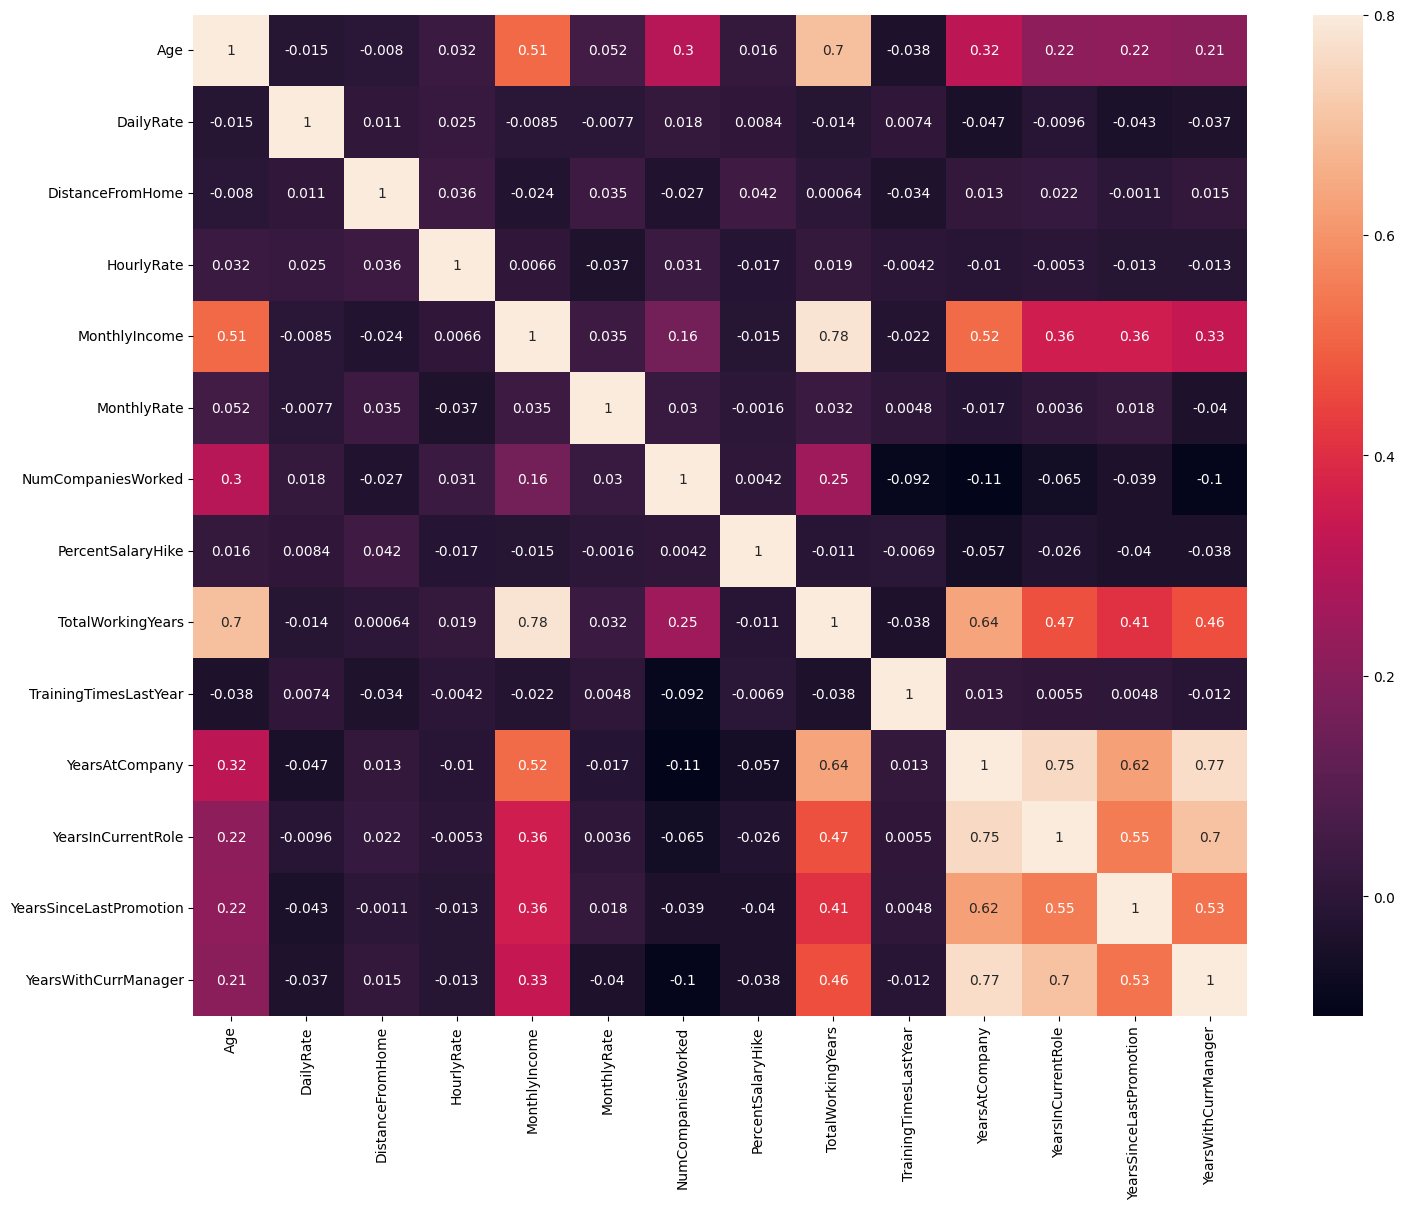

In [21]:
#corr_heatmap=con_data.corr()
f,ax=plt.subplots(figsize=(17,13))
#plotting the heatmap for correlation
sns.heatmap(x_train.corr(),vmax=0.8, annot=True)

In [22]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [23]:
corr_features = correlation(x_train, 0.7)
print(len(set(corr_features)))
print(corr_features)

3
{'TotalWorkingYears', 'YearsWithCurrManager', 'YearsInCurrentRole'}


C:\Users\linet\AppData\Local\Temp\ipykernel_17316\3527147226.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


In [24]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

In [25]:
# create column names for encoded data
cat_cols = ['BusinessTravel', 'Department', 'Education', 'EducationField',
                 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
                 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
                 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                 'WorkLifeBalance']
num_cols=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
 'PercentSalaryHike', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion']

In [26]:
import seaborn as sns

def plot_dist(data, columns):
    for col in columns:
        sns.displot(data=data, x=col, kde=True)

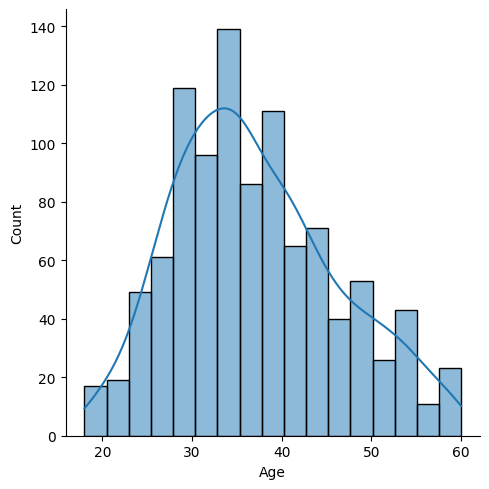

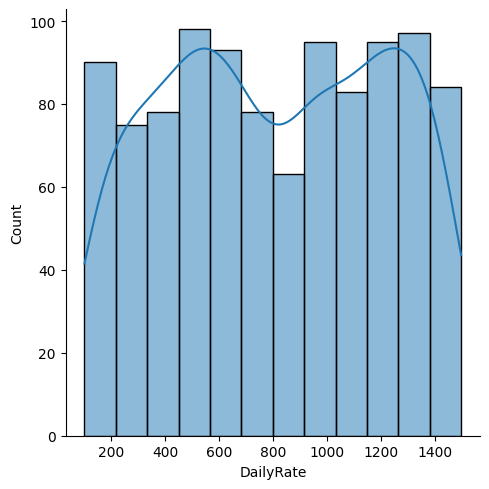

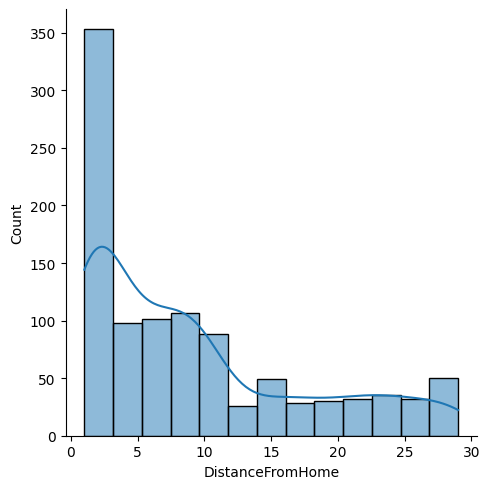

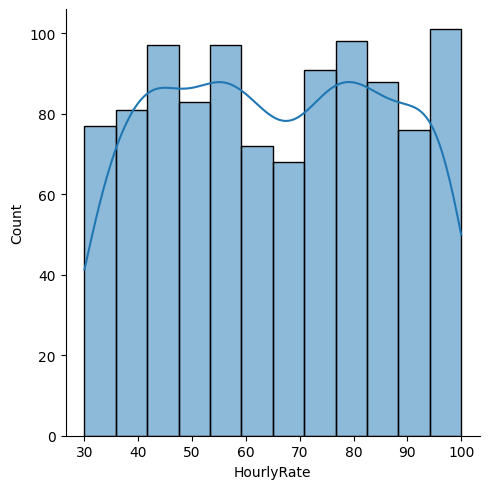

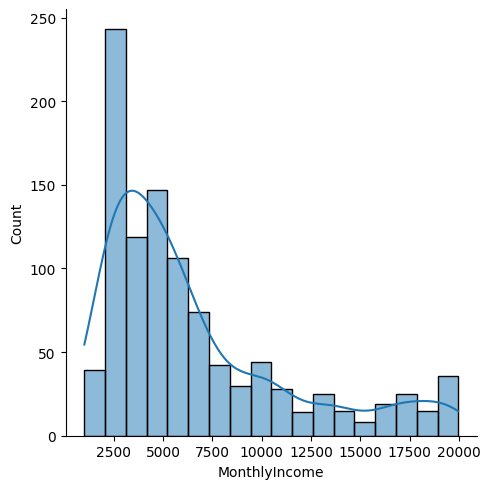

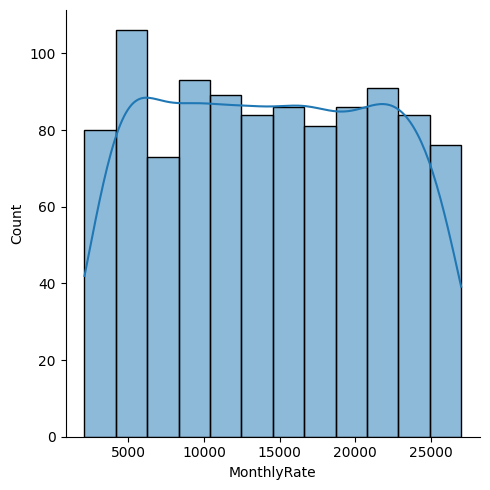

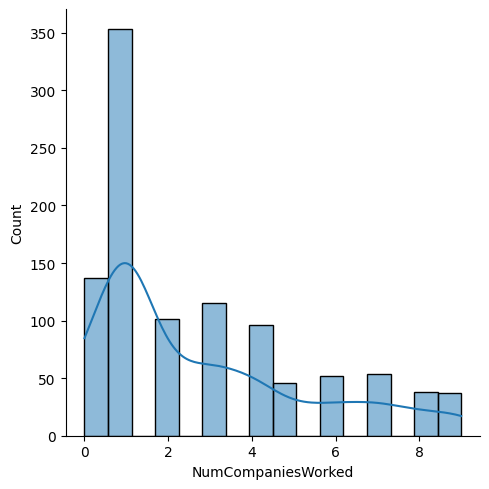

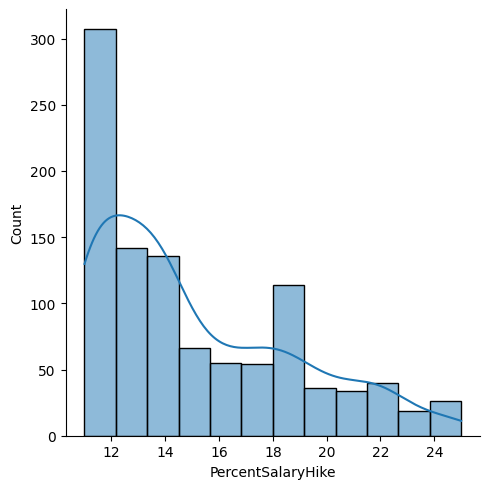

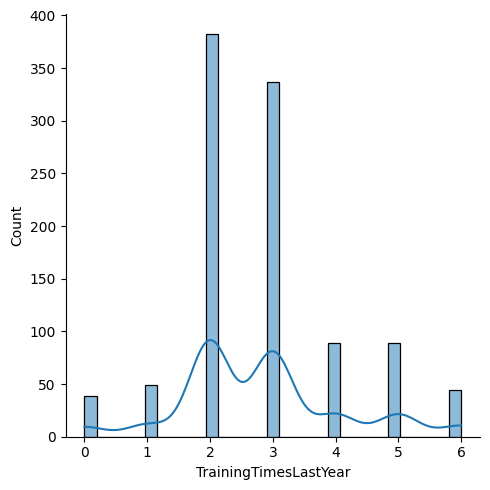

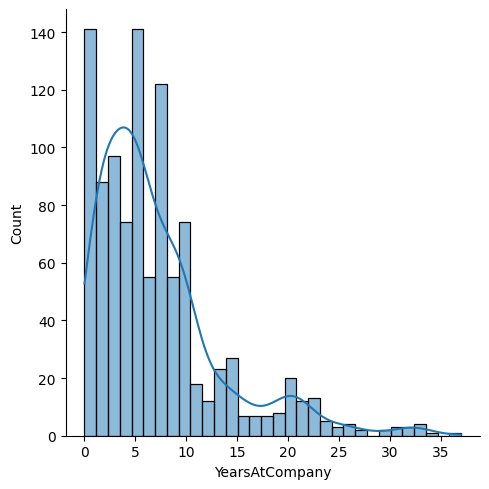

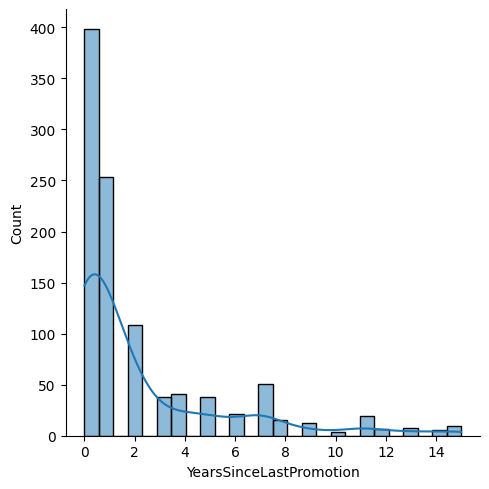

In [27]:
plot_dist(x_train,num_cols)

# encoding

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
# Ordinal encode categorical features
encoder = OneHotEncoder()
x_train_cat = pd.DataFrame(encoder.fit_transform(x_train[cat_cols]).toarray(), columns=encoder.get_feature_names_out())
x_test_cat = pd.DataFrame(encoder.fit_transform(x_test[cat_cols]).toarray(), columns=encoder.get_feature_names_out())

In [30]:
from sklearn.preprocessing import MinMaxScaler #Standard scaler

In [31]:
# Standardize numeric features
scaler = MinMaxScaler()
x_train_num = pd.DataFrame(scaler.fit_transform(x_train[num_cols]), columns=num_cols)
x_test_num = pd.DataFrame(scaler.transform(x_test[num_cols]), columns=num_cols)

In [32]:
# Concatenate encoded categorical and standardized numerical features
x_train_final = pd.concat([x_train_num,x_train_cat], axis=1)
x_test_final = pd.concat([x_test_num,x_test_cat], axis=1)

In [33]:
x_train_final.shape,x_test_final.shape

((1029, 75), (441, 75))

In [34]:
#x_train_final.columns

# balance the imbalance data

In [35]:
y_train.value_counts()

0    876
1    153
Name: Attrition, dtype: int64

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
sm = SMOTE(random_state = 2,k_neighbors=2)
x_train_resampled, y_train_resampled = sm.fit_resample(x_train_final, y_train.ravel())

In [38]:
x_train_resampled.shape, y_train_resampled.shape

((1752, 75), (1752,))

# Modelling

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(random_state=0) 
rf = rf.fit(x_train_resampled, y_train_resampled)

In [41]:
y_train_pred = rf.predict(x_train_resampled)
y_pred = rf.predict(x_test_final)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [43]:
print("accuracy for train data =",accuracy_score(y_train_resampled,y_train_pred))
print("accuracy for test data=",accuracy_score(y_test,y_pred))

accuracy for train data = 1.0
accuracy for test data= 0.8321995464852607


Confusion Matrix:
 [[349   8]
 [ 66  18]]


Text(0.5, 3.722222222222216, 'Predicted label')

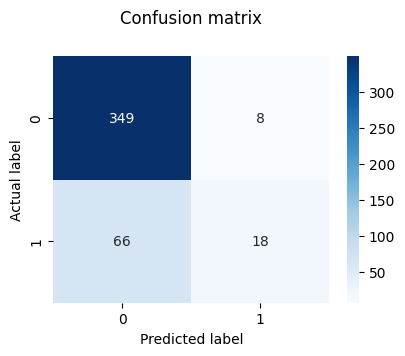

In [44]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)

#plot
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
from sklearn.metrics import f1_score, recall_score, precision_score

In [46]:
# compute F1 score, recall, and precision for train data
f1 = f1_score(y_train_resampled,y_train_pred)
recall = recall_score(y_train_resampled,y_train_pred)
precision = precision_score(y_train_resampled,y_train_pred)
print('for train data')
print('F1 score: {:.4f}'.format(f1))
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))

# compute F1 score, recall, and precision for test data
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print('\nfor test data')
print('F1 score: {:.4f}'.format(f1))
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))

for train data
F1 score: 1.0000
Recall: 1.0000
Precision: 1.0000

for test data
F1 score: 0.3273
Recall: 0.2143
Precision: 0.6923


In [47]:
from sklearn.metrics import roc_curve, auc

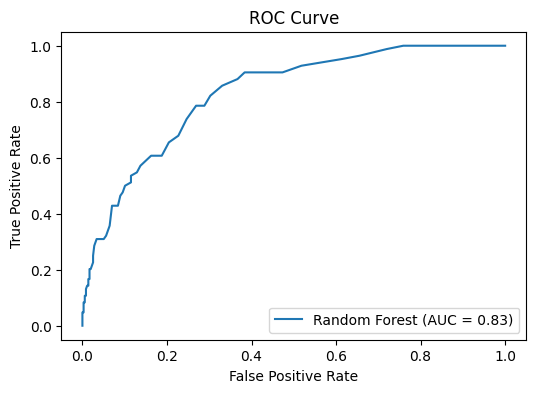

In [48]:
rf_probs = rf.predict_proba(x_test_final)[:, 1]

plt.figure(figsize=(6,4))
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc:.2f})")
# Set the plot title and labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()


# Logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression(max_iter=200)
lr = lr.fit(x_train_resampled, y_train_resampled)

In [51]:
y_train_pred = lr.predict(x_train_resampled)
y_pred = lr.predict(x_test_final)

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [53]:
print("accuracy for train data =",accuracy_score(y_train_resampled,y_train_pred))
print("accuracy for test data=",accuracy_score(y_test,y_pred))

accuracy for train data = 0.8396118721461188
accuracy for test data= 0.782312925170068


Confusion Matrix:
 [[281  76]
 [ 20  64]]


Text(0.5, 3.722222222222216, 'Predicted label')

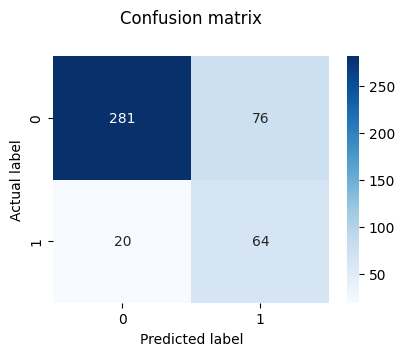

In [54]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)

#plot
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [55]:
from sklearn.metrics import f1_score, recall_score, precision_score

In [56]:
# compute F1 score, recall, and precision for train data
f1 = f1_score(y_train_resampled,y_train_pred)
recall = recall_score(y_train_resampled,y_train_pred)
precision = precision_score(y_train_resampled,y_train_pred)
print('for train data')
print('F1 score: {:.4f}'.format(f1))
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))

# compute F1 score, recall, and precision for test data
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print('\nfor test data')
print('F1 score: {:.4f}'.format(f1))
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))

for train data
F1 score: 0.8428
Recall: 0.8596
Precision: 0.8266

for test data
F1 score: 0.5714
Recall: 0.7619
Precision: 0.4571


In [57]:
from sklearn.metrics import roc_curve, auc

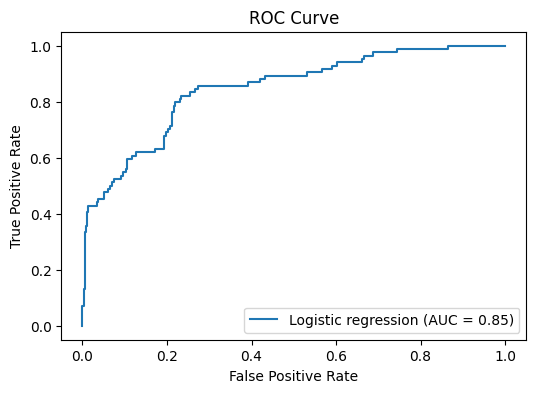

In [58]:
lr_probs = lr.predict_proba(x_test_final)[:, 1]

plt.figure(figsize=(6,4))
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f"Logistic regression (AUC = {roc_auc:.2f})")
# Set the plot title and labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()


# Support Vector classifier

In [59]:
from sklearn.svm import SVC

In [60]:
svm= SVC(probability=True,kernel='linear', random_state=42)
svm = svm.fit(x_train_resampled, y_train_resampled)

In [61]:
y_train_pred = svm.predict(x_train_resampled)
y_pred = svm.predict(x_test_final)

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [63]:
print("accuracy for train data =",accuracy_score(y_train_resampled,y_train_pred))
print("accuracy for test data=",accuracy_score(y_test,y_pred))

accuracy for train data = 0.8430365296803652
accuracy for test data= 0.7777777777777778


Confusion Matrix:
 [[282  75]
 [ 23  61]]


Text(0.5, 3.722222222222216, 'Predicted label')

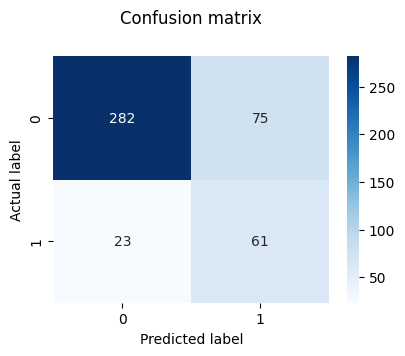

In [64]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)

#plot
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [65]:
from sklearn.metrics import f1_score, recall_score, precision_score

In [66]:
# compute F1 score, recall, and precision for train data
f1 = f1_score(y_train_resampled,y_train_pred)
recall = recall_score(y_train_resampled,y_train_pred)
precision = precision_score(y_train_resampled,y_train_pred)
print('for train data')
print('F1 score: {:.4f}'.format(f1))
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))

# compute F1 score, recall, and precision for test data
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print('\nfor test data')
print('F1 score: {:.4f}'.format(f1))
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))

for train data
F1 score: 0.8454
Recall: 0.8584
Precision: 0.8328

for test data
F1 score: 0.5545
Recall: 0.7262
Precision: 0.4485


In [67]:
from sklearn.metrics import roc_curve, auc

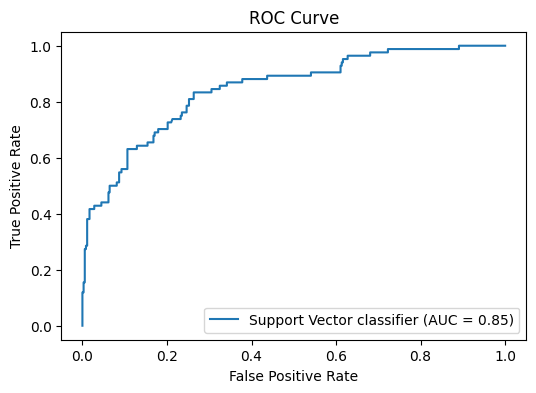

In [68]:
svm_probs = svm.predict_proba(x_test_final)[:, 1]

plt.figure(figsize=(6,4))
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
roc_auc = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f"Support Vector classifier (AUC = {roc_auc:.2f})")

# Set the plot title and labels
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [77]:
def predict(model):
    import pandas as pd
    from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
    
    # Define numeric and categorical columns
    num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 
                'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TrainingTimesLastYear', 
                'YearsAtCompany', 'YearsSinceLastPromotion']
    cat_cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 
                'Gender', 'JobInvolvement', 'JobLevel', 'JobRole',  'JobSatisfaction', 
                'MaritalStatus','OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 
                'WorkLifeBalance']
    
    x_train = pd.read_excel('employee_attrition_rate.xlsx','employee_attrition')
    # Ask for input from user and create dataframe
    input_data = []
    for col in num_cols:
        input_data.append(float(input(f"Enter {col}: ")))
    for col in cat_cols:
        print('-->>',col,'has values',x_train[col].unique())
        input_data.append(input(f"Enter {col}: "))
    input_df = pd.DataFrame([input_data], columns=num_cols+cat_cols)
    
    # Fit scaler and encoder on training data
    scaler = MinMaxScaler().fit(x_train[num_cols])
    encoder = OneHotEncoder(handle_unknown='ignore').fit(x_train[cat_cols])
    
    # Standardize numerical variables
    input_scaled = scaler.transform(input_df[num_cols])
    
    # Encode categorical variables
    input_encoded = pd.DataFrame(encoder.transform(input_df[cat_cols]).toarray(), 
                                 columns=encoder.get_feature_names_out(cat_cols))
    
    # Concatenate encoded and scaled inputs
    input_final = pd.concat([pd.DataFrame(input_scaled, columns=num_cols), input_encoded], axis=1)
    
    # Predict using the model
    prediction = model.predict(input_final)
    if prediction==1:
        print('\nThe Output is: \nEmployee will leave the company')
    else:
        print('\nThe Output is: \nEmployee won\'t leave')
    

In [78]:
predict(lr)

Enter Age: 41
Enter DailyRate: 1000
Enter DistanceFromHome: 5
Enter HourlyRate: 95
Enter MonthlyIncome: 10000
Enter MonthlyRate: 1500
Enter NumCompaniesWorked: 8
Enter PercentSalaryHike: 3
Enter TrainingTimesLastYear: 0
Enter YearsAtCompany: 8
Enter YearsSinceLastPromotion: 0
-->> BusinessTravel has values ['Travel Rarely' 'Travel Frequently' 'Non-Travel']
Enter BusinessTravel: Travel Rarely
-->> Department has values ['Sales' 'Research & Development' 'Human Resources']
Enter Department: Sales
-->> Education has values [2 1 4 3 5]
Enter Education: 3
-->> EducationField has values ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Enter EducationField: Life Sciences
-->> EnvironmentSatisfaction has values [2 3 4 1]
Enter EnvironmentSatisfaction: 2
-->> Gender has values ['Female' 'Male']
Enter Gender: Female
-->> JobInvolvement has values [3 2 4 1]
Enter JobInvolvement: 2
-->> JobLevel has values [2 1 3 4 5]
Enter JobLevel: 2
-->> JobRole has values ['